In [ ]:
# Loading necessary files for hierarchical state clustering

import numpy as np
from pathlib import Path
import pandas as pd

def load_optimal_states(base_dir, mode):
    """
    Load optimal states for a specific mode (EC or EO).
    """
    file_name = f"median_optimal_state_{mode}.txt"
    file_path = Path(base_dir) / file_name
    
    try:
        with open(file_path, 'r') as f:
            content = f.read().strip()
            # Extract the number from format "Median Optimal State (XX): Y.00"
            optimal_states = int(float(content.split(': ')[1]))
        return optimal_states
    except Exception as e:
        print(f"Error loading optimal states for {mode}: {str(e)}")
        return None

def load_participant_data(base_dir, participant_id, mode):
    """
    Load all necessary files for a single participant and mode.
    
    Parameters:
    -----------
    base_dir : str or Path
        Base directory containing participant data
    participant_id : str
        Participant identifier
    mode : str
        Data collection mode ('EC' or 'EO')
        
    Returns:
    --------
    dict
        Dictionary containing all loaded data for the participant
    """
    participant_dir = Path(base_dir) / participant_id / mode
    data = {}
    
    try:
        # Load correlation matrices
        matrices_path = participant_dir / f"{participant_id}_correlation_matrices.npy.npz"
        if matrices_path.exists():
            matrices_data = np.load(matrices_path, allow_pickle=True)
            correlation_matrices = {}
            for key in matrices_data.files:
                state, window = map(int, key.split('_'))
                correlation_matrices[(state, window)] = matrices_data[key][:-2, :-2]
            data['correlation_matrices'] = correlation_matrices
        
        # Load state sequence and probabilities
        state_seq_path = participant_dir / f"{participant_id}_state_sequence.npy"
        state_prob_path = participant_dir / f"{participant_id}_state_probs.npy"
        if state_seq_path.exists() and state_prob_path.exists():
            data['state_sequence'] = np.load(state_seq_path)
            data['state_probs'] = np.load(state_prob_path)
        
        # Load temporal features
        temporal_path = participant_dir / f"{participant_id}_temporal_features.npz"
        if temporal_path.exists():
            temporal_data = np.load(temporal_path)
            data['temporal_features'] = {
                'fractional_occupancy': temporal_data['fractional_occupancy'],
                'transition_probabilities': temporal_data['transition_probabilities'],
                'mean_lifetime': temporal_data['mean_lifetime'],
                'mean_interval_length': temporal_data['mean_interval_length']
            }
        
        # Load network assignments
        network_path = participant_dir / f"{participant_id}_network_assignment.npy"
        if network_path.exists():
            data['network_assignment'] = np.load(network_path, allow_pickle=True).item()
            
        return data
    
    except Exception as e:
        print(f"Error loading data for participant {participant_id}, mode {mode}: {str(e)}")
        return None

def load_all_participants_data(base_dir):
    """
    Load data for all participants across groups.
    
    Parameters:
    -----------
    base_dir : str
        Base directory containing participant data
        
    Returns:
    --------
    tuple
        (all_data, optimal_states_dict)
        all_data: dict with structure {group: {participant: {mode: data_dict}}}
        optimal_states_dict: dict with structure {mode: optimal_states}
    """
    # Define participant groups
    groups = {
        'YAC': ['101', '102', '103', '104', '105', '111', '112', '113', '114', 
                '115', '116', '117', '118', '119', '120'],
        'TCOA': ['401', '402', '403', '404', '406', '407', '408', '409', '410', 
                 '411', '412', '413', '414', '415', '416'],
        'OAC': ['202', '205', '206', '207', '208', '209', '210', '211', '214', 
                '215', '216', '217', '218', '219', '221']
    }
    
    # Load optimal states for each mode
    optimal_states = {}
    for mode in ['EC', 'EO']:
        optimal_states[mode] = load_optimal_states(base_dir, mode)
        print(f"Loaded optimal states for {mode}: {optimal_states[mode]}")
    
    # Initialize data structure
    all_data = {group: {} for group in groups}
    
    # Load data for each group and participant
    for group, participants in groups.items():
        print(f"\nProcessing {group} group:")
        
        for participant in participants:
            print(f"Loading participant {participant}...", end=' ')
            all_data[group][participant] = {}
            
            for mode in ['EC', 'EO']:
                data = load_participant_data(base_dir, participant, mode)
                if data is not None:
                    data['optimal_states'] = optimal_states[mode]  # Add optimal states to participant data
                    all_data[group][participant][mode] = data
                    print(f"{mode} loaded", end=' ')
            
            print()  # New line after processing both modes
    
    return all_data, optimal_states

# Example usage:
if __name__ == "__main__":
    # Set the base directory
    base_dir = '/home/cerna3/neuroconn/data/out/subjects/'
    
    # Load all data
    print("Loading data for all participants...")
    all_data, optimal_states = load_all_participants_data(base_dir)
    
    # Print summary
    print("\nData Loading Summary:")
    print("-" * 50)
    print(f"Optimal states loaded: {optimal_states}")
    
    for group in all_data:
        n_participants = len(all_data[group])
        print(f"\n{group}:")
        print(f"  Number of participants: {n_participants}")
        
        for mode in ['EC', 'EO']:
            n_mode = sum(1 for p in all_data[group].values() if mode in p)
            print(f"  {mode} data available: {n_mode}/{n_participants}")

Loading data for all participants...
Loaded optimal states for EC: 7
Loaded optimal states for EO: 5

Processing YAC group:
Loading participant 101... EC loaded EO loaded 
Loading participant 102... EC loaded EO loaded 
Loading participant 103... EC loaded EO loaded 
Loading participant 104... EC loaded EO loaded 
Loading participant 105... EC loaded EO loaded 
Loading participant 111... EC loaded EO loaded 
Loading participant 112... EC loaded EO loaded 
Loading participant 113... EC loaded EO loaded 
Loading participant 114... EC loaded EO loaded 
Loading participant 115... EC loaded EO loaded 
Loading participant 116... EC loaded EO loaded 
Loading participant 117... EC loaded EO loaded 
Loading participant 118... EC loaded EO loaded 
Loading participant 119... EC loaded EO loaded 
Loading participant 120... EC loaded EO loaded 

Processing TCOA group:
Loading participant 401... EC loaded EO loaded 
Loading participant 402... EC loaded EO loaded 
Loading participant 403... EC loaded


Analyzing EC condition:
  YAC: Averaging 15 valid matrices
  TCOA: Averaging 15 valid matrices
  OAC: Averaging 15 valid matrices

Analyzing YAC group (EC):


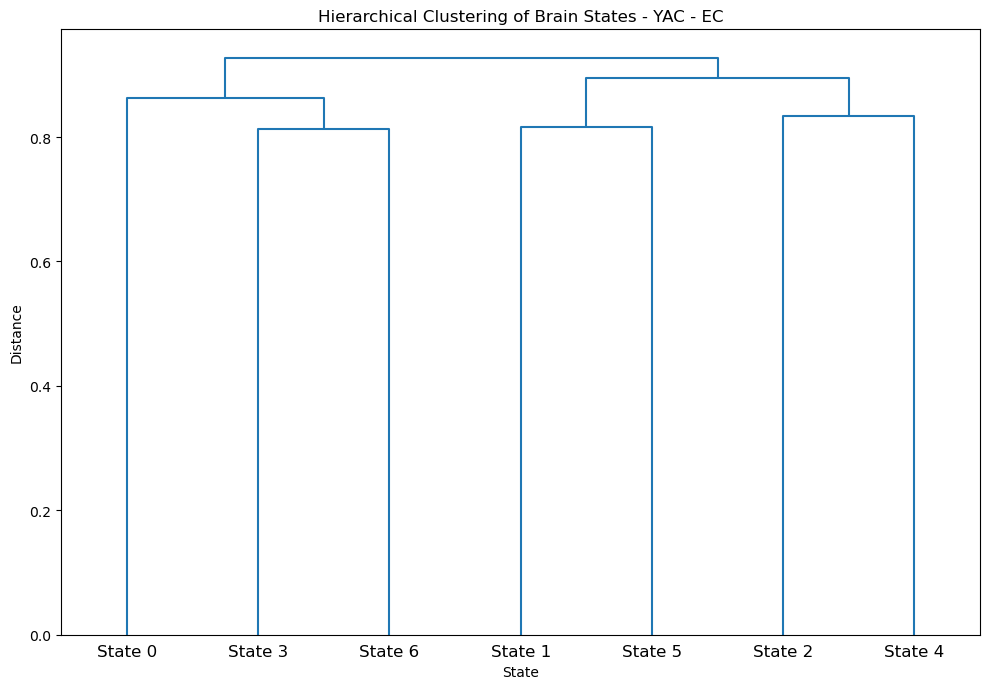

Calculating cluster metrics...
  Processing 2 clusters...
  Processing 3 clusters...
  Processing 4 clusters...
  Processing 5 clusters...
  Processing 6 clusters...
  Processing 7 clusters...
  Processing 8 clusters...
  Processing 9 clusters...
  Processing 10 clusters...
Plotting cluster metrics for YAC - EC...


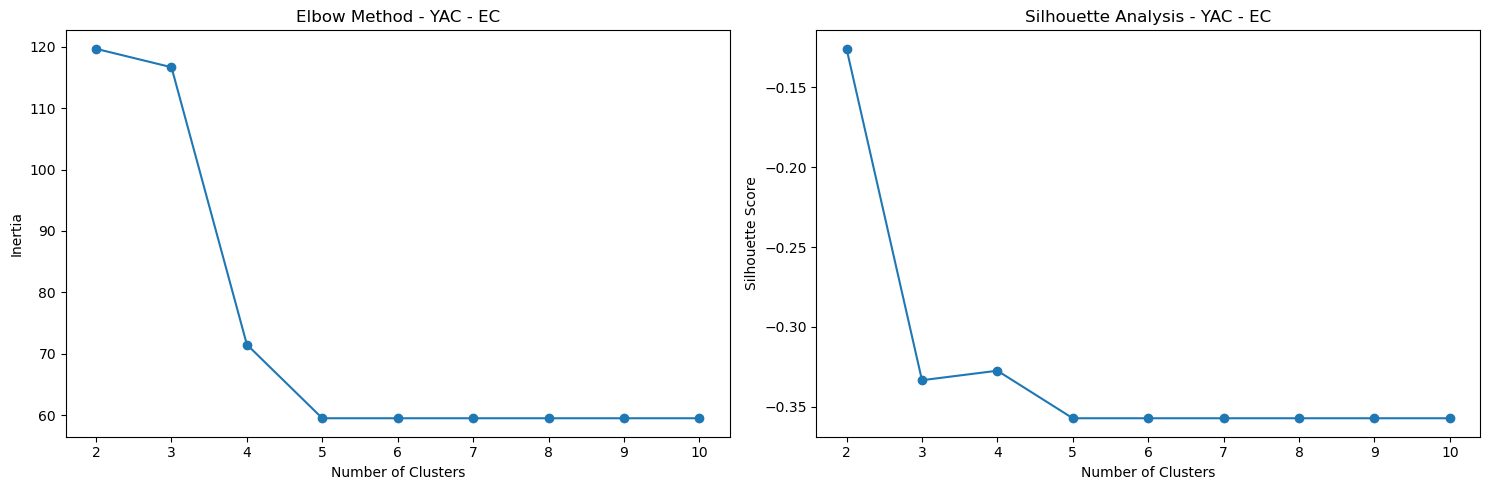

Optimal number of clusters suggested by Elbow method: 3
Optimal number of clusters suggested by Silhouette analysis: 2

Analyzing TCOA group (EC):


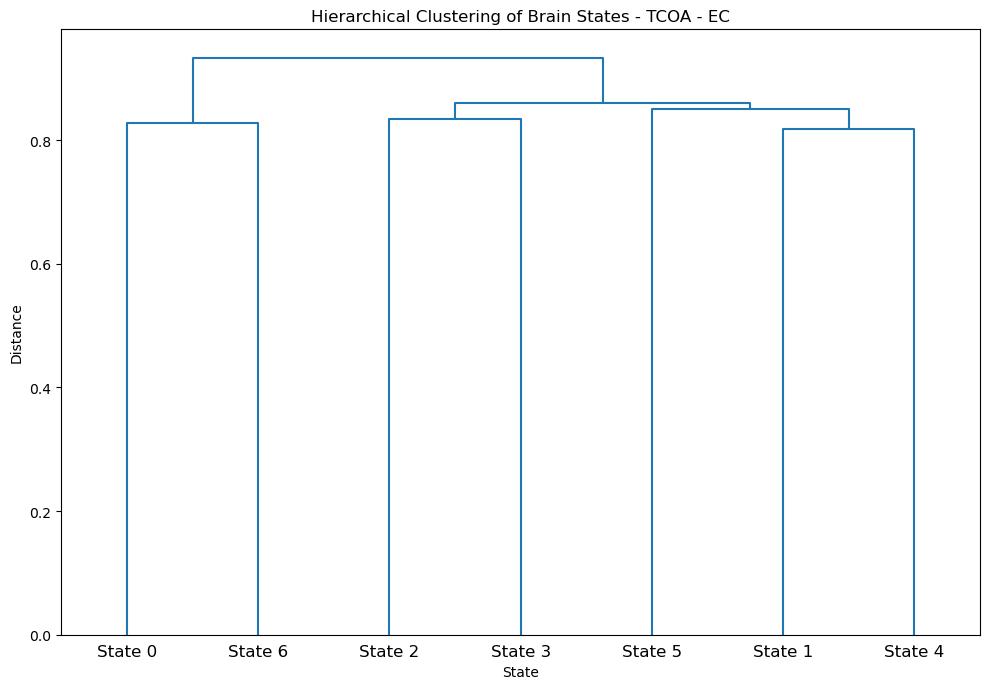

Calculating cluster metrics...
  Processing 2 clusters...
  Processing 3 clusters...
  Processing 4 clusters...
  Processing 5 clusters...
  Processing 6 clusters...
  Processing 7 clusters...
  Processing 8 clusters...
  Processing 9 clusters...
  Processing 10 clusters...
Plotting cluster metrics for TCOA - EC...


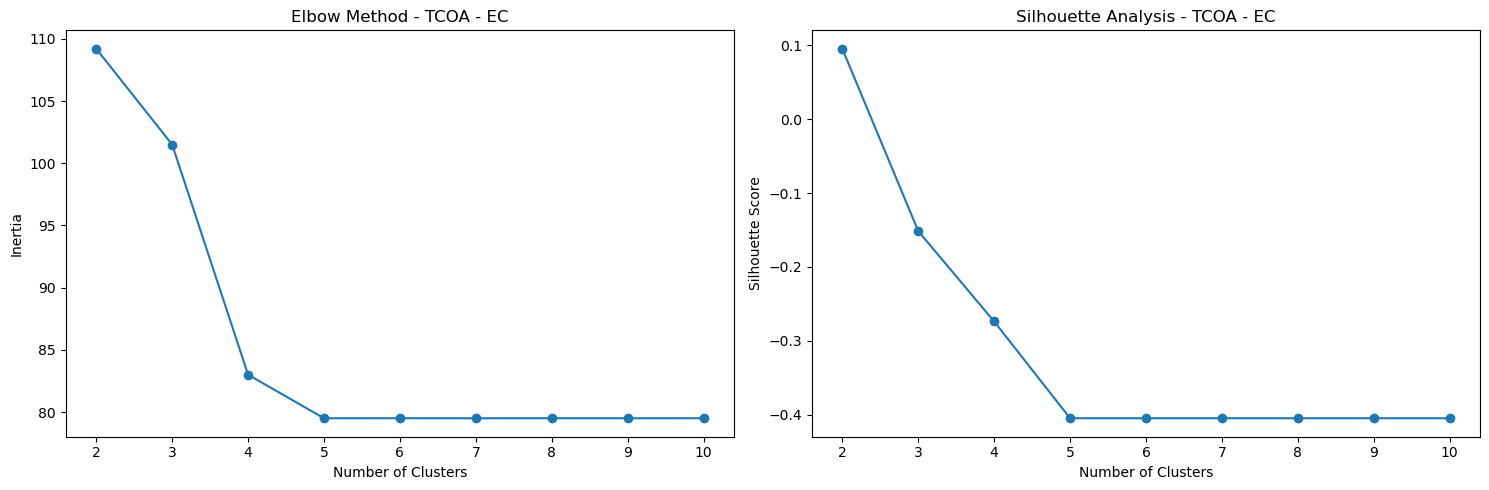

Optimal number of clusters suggested by Elbow method: 3
Optimal number of clusters suggested by Silhouette analysis: 2

Analyzing OAC group (EC):


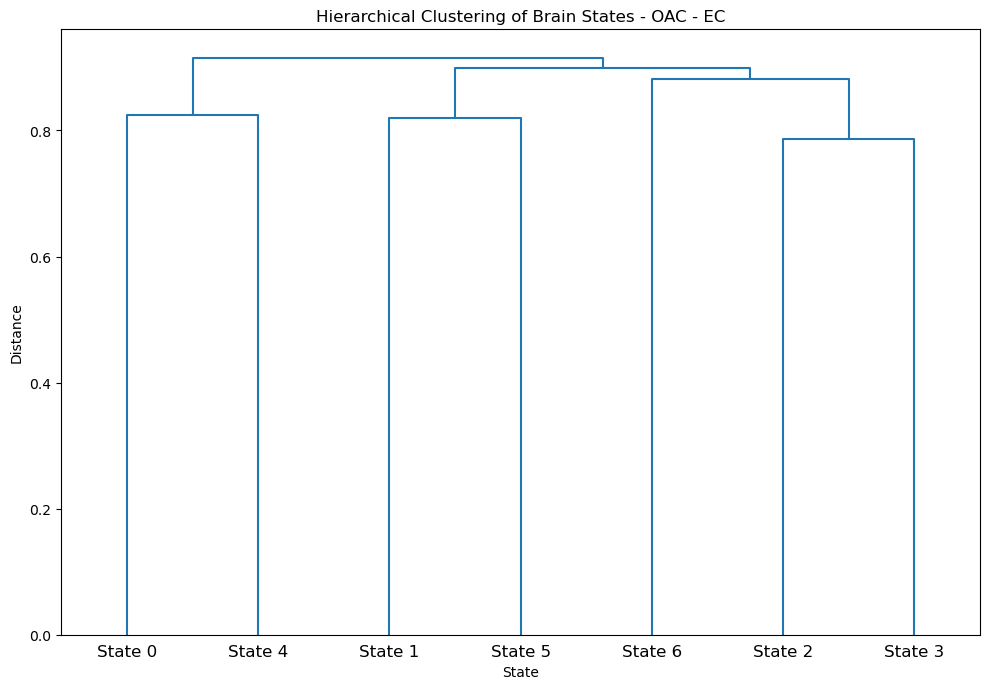

Calculating cluster metrics...
  Processing 2 clusters...
  Processing 3 clusters...
  Processing 4 clusters...
  Processing 5 clusters...
  Processing 6 clusters...
  Processing 7 clusters...
  Processing 8 clusters...
  Processing 9 clusters...
  Processing 10 clusters...
Plotting cluster metrics for OAC - EC...


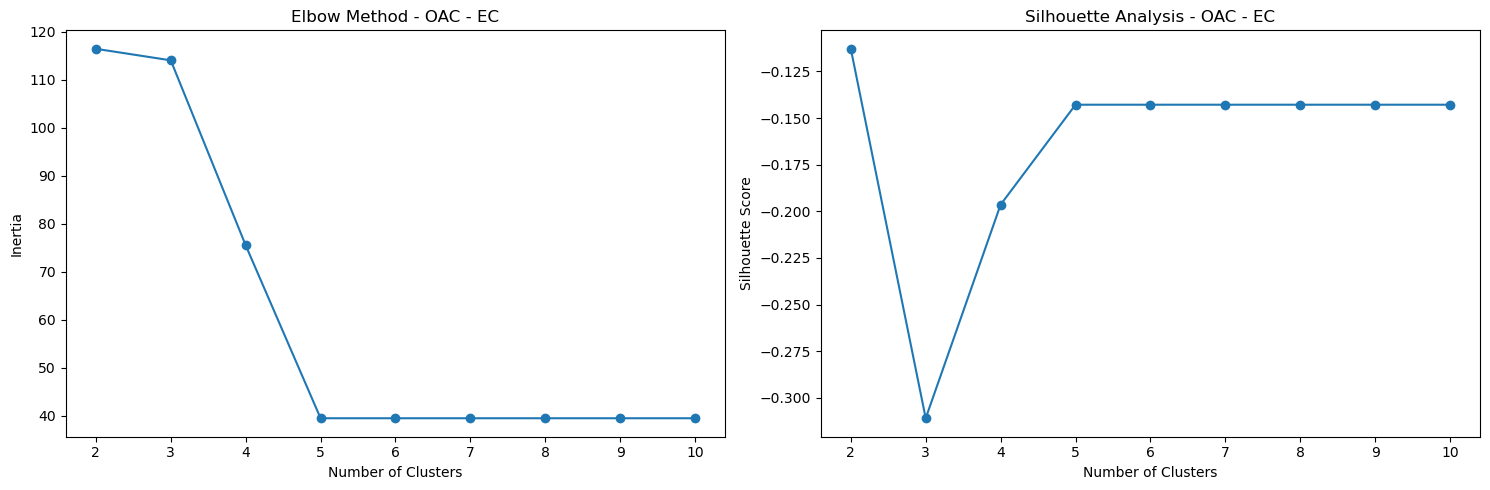

Optimal number of clusters suggested by Elbow method: 3
Optimal number of clusters suggested by Silhouette analysis: 2

Analyzing EO condition:
  YAC: Averaging 15 valid matrices
  TCOA: Averaging 15 valid matrices
  OAC: Averaging 15 valid matrices

Analyzing YAC group (EO):


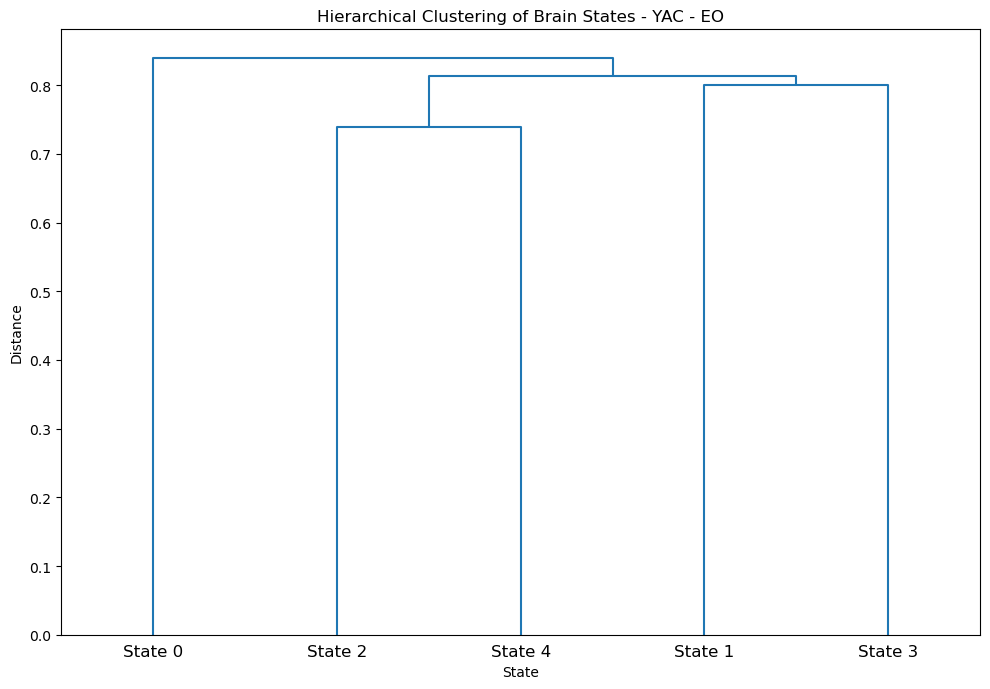

Calculating cluster metrics...
  Processing 2 clusters...
  Processing 3 clusters...
  Processing 4 clusters...
  Processing 5 clusters...
  Processing 6 clusters...
  Processing 7 clusters...
  Processing 8 clusters...
  Processing 9 clusters...
  Processing 10 clusters...
Plotting cluster metrics for YAC - EO...


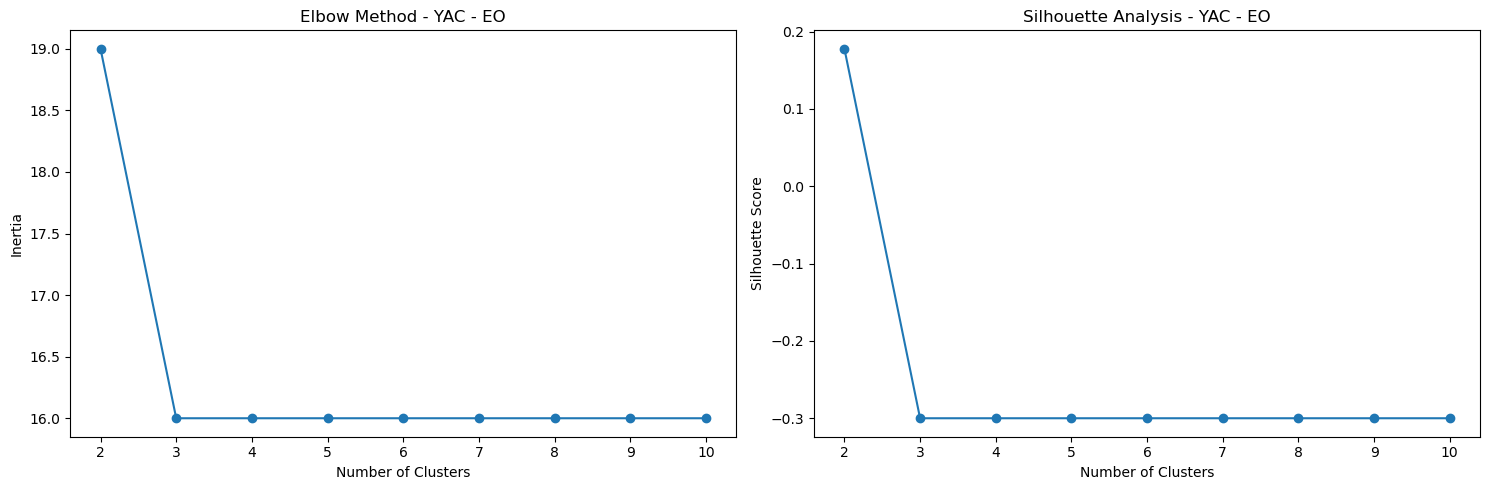

Optimal number of clusters suggested by Elbow method: 2
Optimal number of clusters suggested by Silhouette analysis: 2

Analyzing TCOA group (EO):


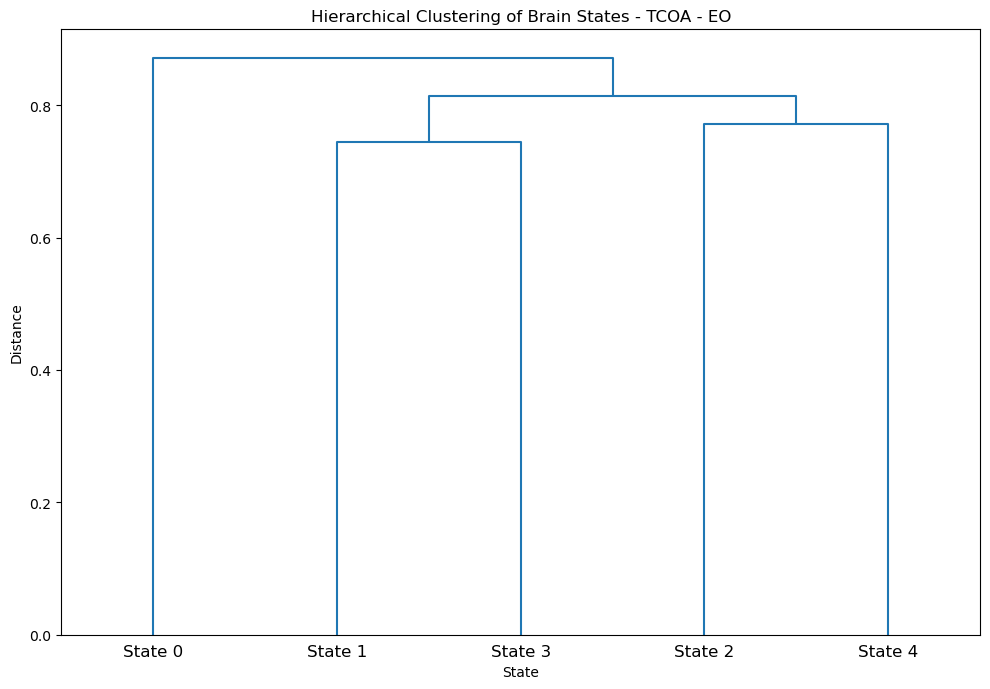

Calculating cluster metrics...
  Processing 2 clusters...
  Processing 3 clusters...
  Processing 4 clusters...
  Processing 5 clusters...
  Processing 6 clusters...
  Processing 7 clusters...
  Processing 8 clusters...
  Processing 9 clusters...
  Processing 10 clusters...
Plotting cluster metrics for TCOA - EO...


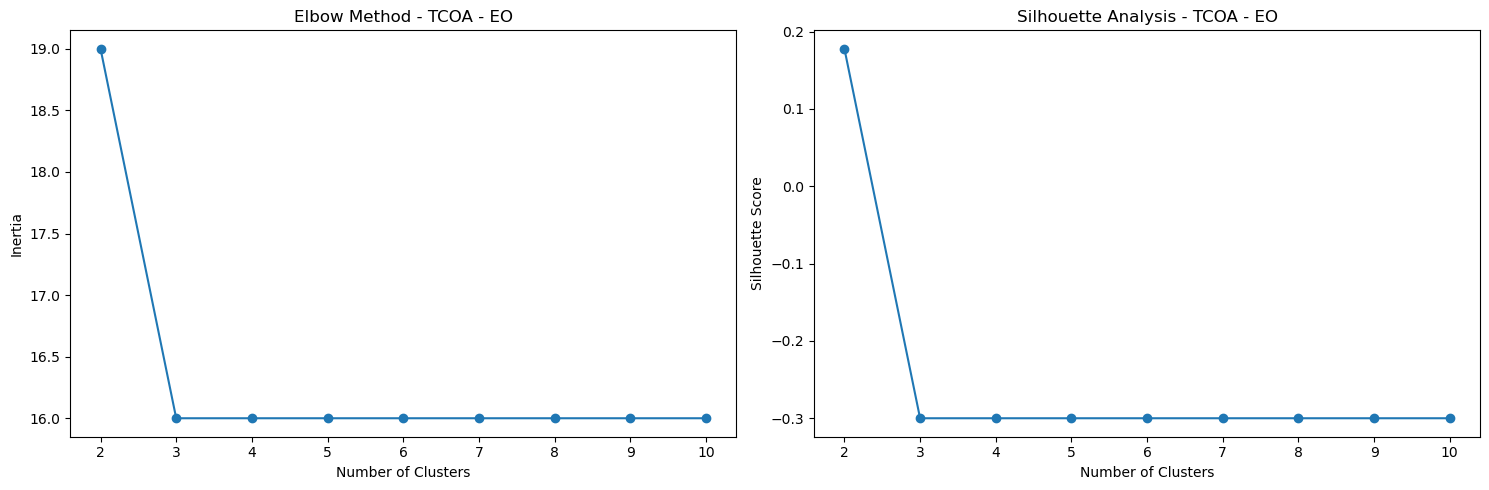

Optimal number of clusters suggested by Elbow method: 2
Optimal number of clusters suggested by Silhouette analysis: 2

Analyzing OAC group (EO):


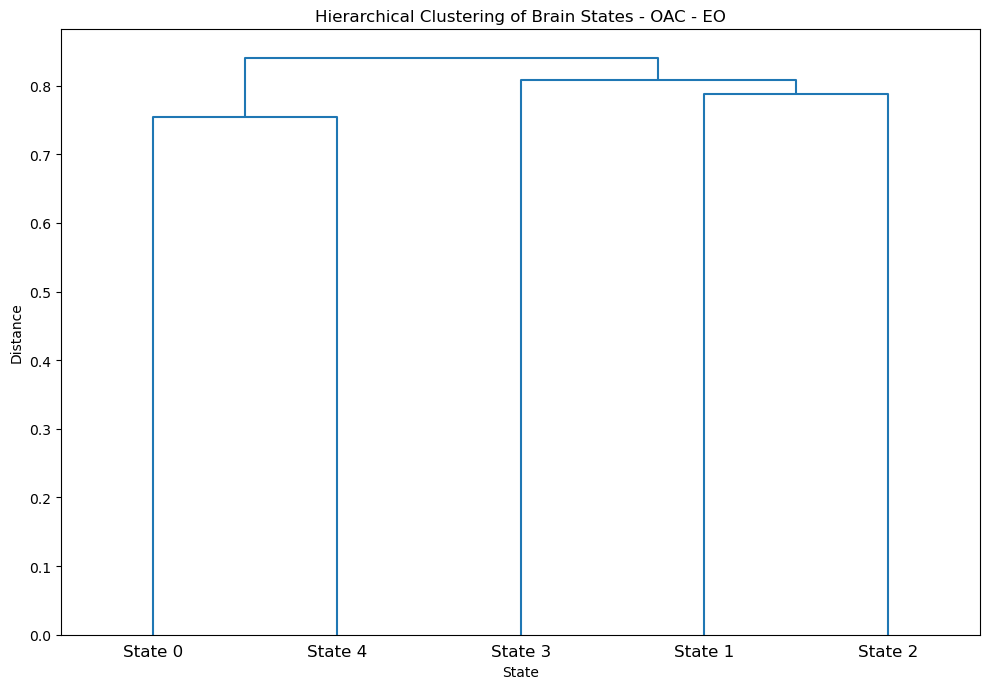

Calculating cluster metrics...
  Processing 2 clusters...
  Processing 3 clusters...
  Processing 4 clusters...
  Processing 5 clusters...
  Processing 6 clusters...
  Processing 7 clusters...
  Processing 8 clusters...
  Processing 9 clusters...
  Processing 10 clusters...
Plotting cluster metrics for OAC - EO...


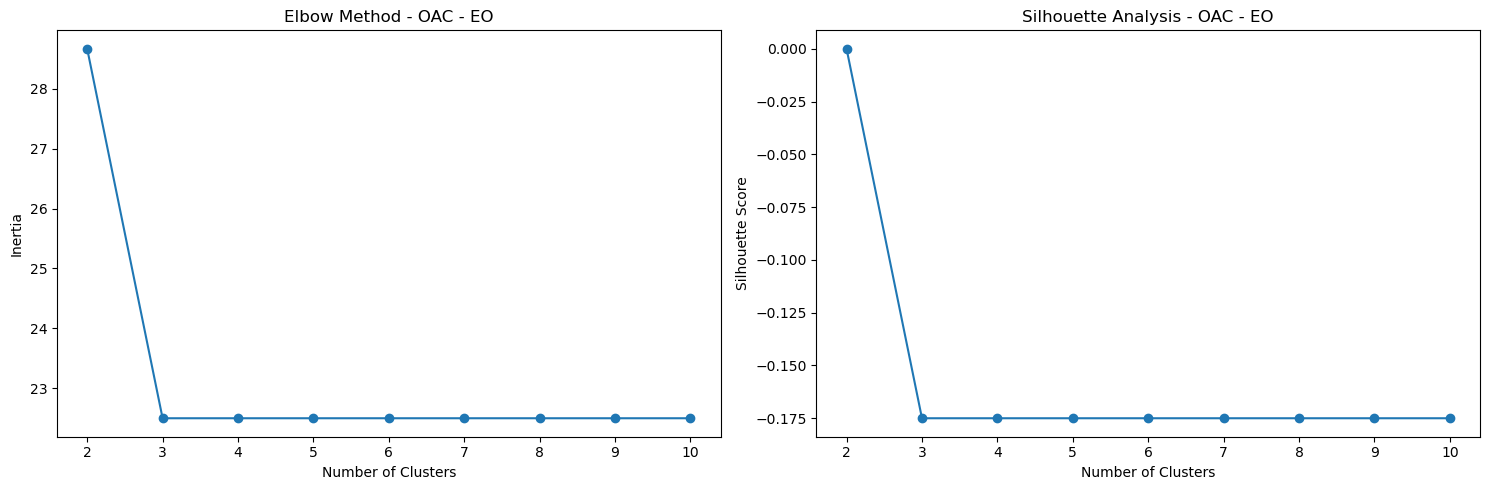

Optimal number of clusters suggested by Elbow method: 2
Optimal number of clusters suggested by Silhouette analysis: 2

Analysis complete!


In [ ]:
# Hierarchical State CLustering Analysis

import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics import silhouette_score
import seaborn as sns
from collections import defaultdict

def validate_transition_matrix(matrix, participant_id):
    """
    Validate a transition probability matrix.
    
    Parameters:
    -----------
    matrix : ndarray
        Transition probability matrix to validate
    participant_id : str
        ID of the participant for error reporting
        
    Returns:
    --------
    bool
        True if matrix is valid, False otherwise
    """
    if matrix is None:
        print(f"  Warning: Matrix is None for participant {participant_id}")
        return False
        
    try:
        matrix = np.array(matrix)
        if not isinstance(matrix, np.ndarray):
            print(f"  Warning: Matrix is not a numpy array for participant {participant_id}")
            return False
            
        if len(matrix.shape) != 2:
            print(f"  Warning: Matrix is not 2D for participant {participant_id}. Shape: {matrix.shape}")
            return False
            
        if matrix.shape[0] != matrix.shape[1]:
            print(f"  Warning: Matrix is not square for participant {participant_id}. Shape: {matrix.shape}")
            return False
            
        if not np.allclose(np.sum(matrix, axis=1), 1):
            print(f"  Warning: Matrix rows don't sum to 1 for participant {participant_id}")
            return False
            
        return True
    except Exception as e:
        print(f"  Error validating matrix for participant {participant_id}: {str(e)}")
        return False

def aggregate_transition_probabilities(all_data):
    """
    Aggregate transition probabilities across all participants within each group.
    """
    group_transitions = defaultdict(list)
    matrix_shapes = defaultdict(list)
    
    # First pass: collect matrix shapes and validate matrices
    print("\nValidating transition matrices...")
    for group in all_data:
        print(f"\nGroup: {group}")
        for participant in all_data[group]:
            for mode in ['EC', 'EO']:
                if mode in all_data[group][participant]:
                    data = all_data[group][participant][mode]
                    if 'temporal_features' in data:
                        trans_prob = data['temporal_features'].get('transition_probabilities')
                        
                        # Validate matrix
                        if validate_transition_matrix(trans_prob, participant):
                            matrix_shapes[group].append(trans_prob.shape)
                            print(f"  Participant {participant} ({mode}): Valid matrix with shape {trans_prob.shape}")
                        else:
                            print(f"  Participant {participant} ({mode}): Invalid matrix")
    
    # Check for consistency within groups
    print("\nChecking matrix shape consistency within groups...")
    group_shapes = {}
    for group in matrix_shapes:
        shapes = matrix_shapes[group]
        if not shapes:
            print(f"  Warning: No valid matrices found for group {group}")
            continue
            
        unique_shapes = set(shape[0] for shape in shapes)  # Use first dimension since matrices are square
        if len(unique_shapes) > 1:
            print(f"  Warning: Inconsistent matrix shapes in group {group}: {unique_shapes}")
            print("  Using most common shape...")
            most_common_shape = max(unique_shapes, key=lambda x: sum(1 for s in shapes if s[0] == x))
            group_shapes[group] = most_common_shape
        else:
            group_shapes[group] = list(unique_shapes)[0]
        print(f"  {group}: Using shape {group_shapes[group]}x{group_shapes[group]}")
    
    # Second pass: collect valid matrices of correct shape
    print("\nCollecting valid matrices...")
    averaged_transitions = {}
    for group in all_data:
        if group not in group_shapes:
            continue
            
        target_shape = group_shapes[group]
        valid_matrices = []
        
        for participant in all_data[group]:
            for mode in ['EC', 'EO']:
                if mode in all_data[group][participant]:
                    data = all_data[group][participant][mode]
                    if 'temporal_features' in data:
                        trans_prob = data['temporal_features'].get('transition_probabilities')
                        if (validate_transition_matrix(trans_prob, participant) and 
                            trans_prob.shape[0] == target_shape):
                            valid_matrices.append(trans_prob)
        
        if valid_matrices:
            print(f"  {group}: Averaging {len(valid_matrices)} valid matrices")
            averaged_transitions[group] = np.mean(valid_matrices, axis=0)
        else:
            print(f"  Warning: No valid matrices to average for {group}")
    
    return averaged_transitions

def hierarchical_state_clustering(transition_probabilities):
    """
    Perform hierarchical clustering on states based on transition probabilities.
    """
    distances = 1 - transition_probabilities
    distances = (distances + distances.T) / 2
    np.fill_diagonal(distances, 0)
    return linkage(squareform(distances), method='ward')

def plot_state_dendrogram(linkage_matrix, n_states, group_name):
    """
    Plot dendrogram of state hierarchy.
    """
    plt.figure(figsize=(10, 7))
    dendrogram(linkage_matrix, labels=[f"State {i}" for i in range(n_states)])
    plt.title(f'Hierarchical Clustering of Brain States - {group_name}')
    plt.xlabel('State')
    plt.ylabel('Distance')
    plt.tight_layout()
    plt.show()

def analyze_hierarchical_states(all_data):
    """
    Perform hierarchical state clustering analysis for each group and condition.
    """
    # Analyze each mode separately
    for mode in ['EC', 'EO']:
        print(f"\nAnalyzing {mode} condition:")
        
        # Get averaged transition probabilities for each group
        group_transitions = {}
        for group in all_data:
            valid_matrices = []
            target_shape = 7 if mode == 'EC' else 5  # Set correct shape based on mode
            
            for participant in all_data[group]:
                if mode in all_data[group][participant]:
                    data = all_data[group][participant][mode]
                    if 'temporal_features' in data:
                        trans_prob = data['temporal_features'].get('transition_probabilities')
                        if (validate_transition_matrix(trans_prob, participant) and 
                            trans_prob.shape[0] == target_shape):
                            valid_matrices.append(trans_prob)
            
            if valid_matrices:
                print(f"  {group}: Averaging {len(valid_matrices)} valid matrices")
                group_transitions[group] = np.mean(valid_matrices, axis=0)
        
        # Analyze each group
        for group in group_transitions:
            print(f"\nAnalyzing {group} group ({mode}):")
            trans_prob = group_transitions[group]
            
            try:
                # Perform hierarchical clustering
                linkage_matrix = hierarchical_state_clustering(trans_prob)
                
                # Plot dendrogram
                n_states = trans_prob.shape[0]  # Use actual matrix shape
                plot_state_dendrogram(linkage_matrix, n_states, f"{group} - {mode}")
                
                # Calculate and plot metrics
                inertias, silhouette_scores = calculate_cluster_metrics(linkage_matrix)
                plot_cluster_metrics(inertias, silhouette_scores, f"{group} - {mode}")
                
                # Print optimal number of clusters
                elbow_optimal = np.argmin(np.diff(inertias)) + 2
                silhouette_optimal = np.argmax(silhouette_scores) + 2
                print(f"Optimal number of clusters suggested by Elbow method: {elbow_optimal}")
                print(f"Optimal number of clusters suggested by Silhouette analysis: {silhouette_optimal}")
                
            except Exception as e:
                print(f"Error processing {group} - {mode}: {str(e)}")
    
    print("\nAnalysis complete!")

def calculate_cluster_metrics(linkage_matrix, max_clusters=10):
    """
    Calculate elbow and silhouette metrics for different numbers of clusters.
    """
    print("Calculating cluster metrics...")
    n_samples = linkage_matrix.shape[0] + 1
    inertias = []
    silhouette_scores = []
    
    distances = squareform(pdist(np.arange(n_samples).reshape(-1, 1)))
    
    for n_clusters in range(2, max_clusters + 1):
        print(f"  Processing {n_clusters} clusters...")
        clusters = fcluster(linkage_matrix, n_clusters, criterion='maxclust')
        
        # Calculate inertia
        centroids = np.zeros((n_clusters, n_samples))
        for i in range(n_clusters):
            if np.sum(clusters == i + 1) > 0:
                centroids[i] = np.mean(distances[clusters == i + 1], axis=0)
        inertia = np.sum([np.sum((distances[clusters == i + 1] - centroids[i]) ** 2)
                         for i in range(n_clusters)])
        inertias.append(inertia)
        
        # Calculate silhouette score
        if len(np.unique(clusters)) > 1:  # Only calculate if we have at least 2 clusters
            score = silhouette_score(distances, clusters, metric='precomputed')
            silhouette_scores.append(score)
    
    return inertias, silhouette_scores

def plot_cluster_metrics(inertias, silhouette_scores, group_name):
    """
    Plot elbow and silhouette analysis results.
    """
    print(f"Plotting cluster metrics for {group_name}...")
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Elbow method plot
    ax1.plot(range(2, len(inertias) + 2), inertias, marker='o')
    ax1.set_xlabel('Number of Clusters')
    ax1.set_ylabel('Inertia')
    ax1.set_title(f'Elbow Method - {group_name}')
    
    # Silhouette analysis plot
    ax2.plot(range(2, len(silhouette_scores) + 2), silhouette_scores, marker='o')
    ax2.set_xlabel('Number of Clusters')
    ax2.set_ylabel('Silhouette Score')
    ax2.set_title(f'Silhouette Analysis - {group_name}')
    
    plt.tight_layout()
    plt.show()

# Execute
results = analyze_hierarchical_states(all_data)

Starting group-level connectivity aggregation...

Processing group YAC with 15 participants.
  Loaded files for participant 101 in mode EC.
  Loaded files for participant 101 in mode EO.
  Loaded files for participant 102 in mode EC.
  Loaded files for participant 102 in mode EO.
  Loaded files for participant 103 in mode EC.
  Loaded files for participant 103 in mode EO.
  Loaded files for participant 104 in mode EC.
  Loaded files for participant 104 in mode EO.
  Loaded files for participant 105 in mode EC.
  Loaded files for participant 105 in mode EO.
  Loaded files for participant 111 in mode EC.
  Loaded files for participant 111 in mode EO.
  Loaded files for participant 112 in mode EC.
  Loaded files for participant 112 in mode EO.
  Loaded files for participant 113 in mode EC.
  Loaded files for participant 113 in mode EO.
  Loaded files for participant 114 in mode EC.
  Loaded files for participant 114 in mode EO.
  Loaded files for participant 115 in mode EC.
  Loaded files

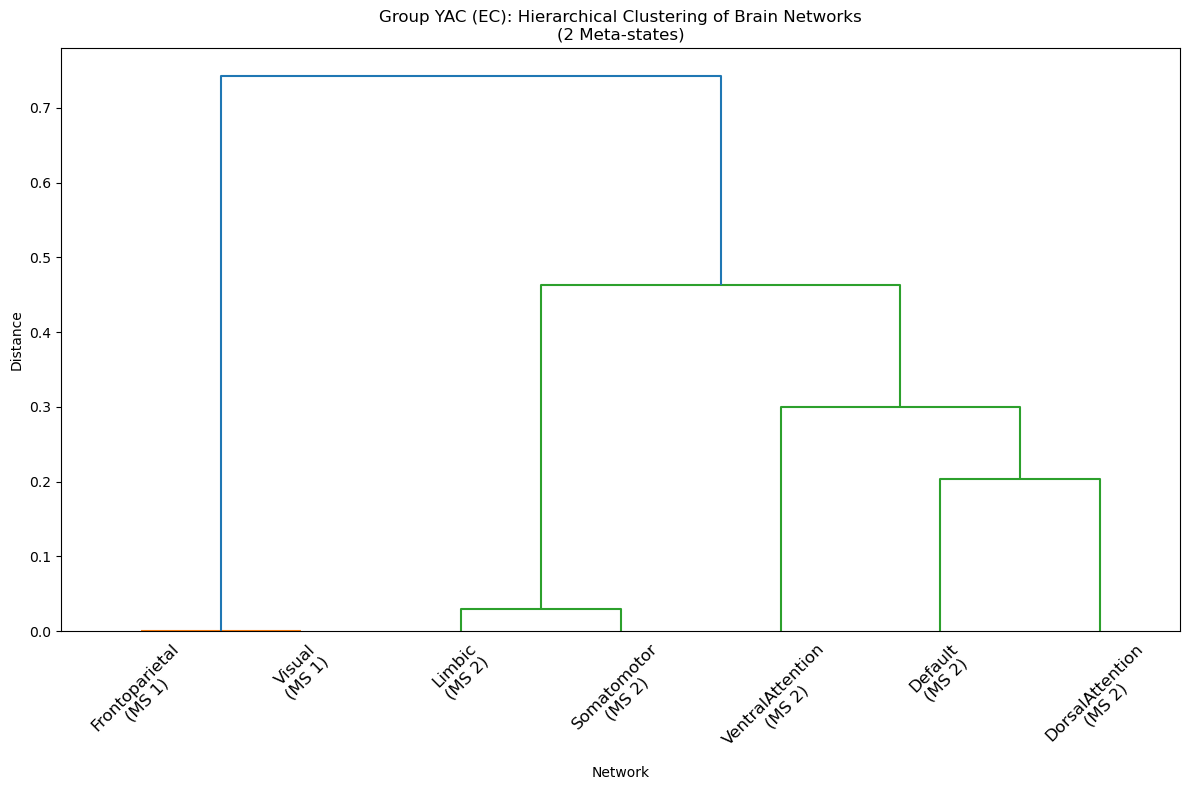

  Meta-state Composition for Group YAC EC:
    Meta-state 2: Default, DorsalAttention, Limbic, Somatomotor, VentralAttention
    Meta-state 1: Frontoparietal, Visual

=== Processing Group: YAC, Mode: EO ===
  Computed similarity matrix for 7 networks.
  Performed hierarchical clustering.
  Optimal number of meta-states determined: 4


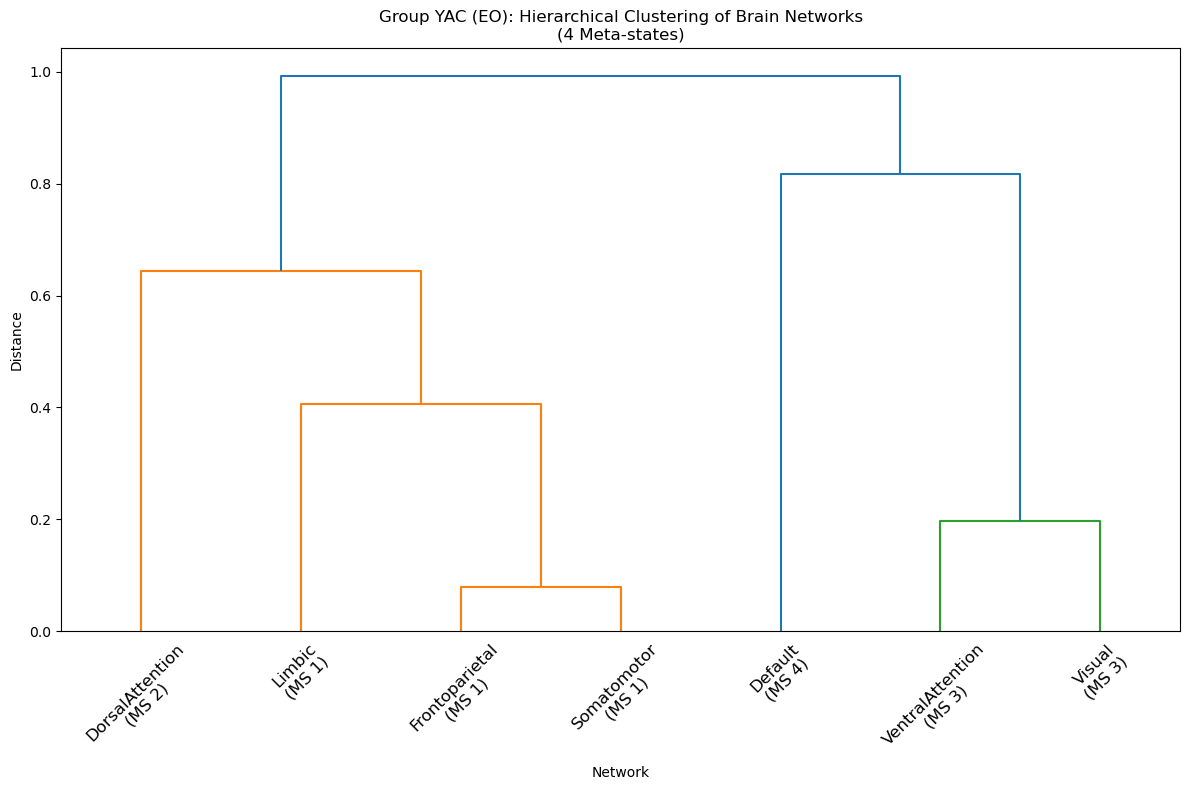

  Meta-state Composition for Group YAC EO:
    Meta-state 4: Default
    Meta-state 2: DorsalAttention
    Meta-state 1: Frontoparietal, Limbic, Somatomotor
    Meta-state 3: VentralAttention, Visual

=== Processing Group: TCOA, Mode: EC ===
  Computed similarity matrix for 7 networks.
  Performed hierarchical clustering.
  Optimal number of meta-states determined: 4


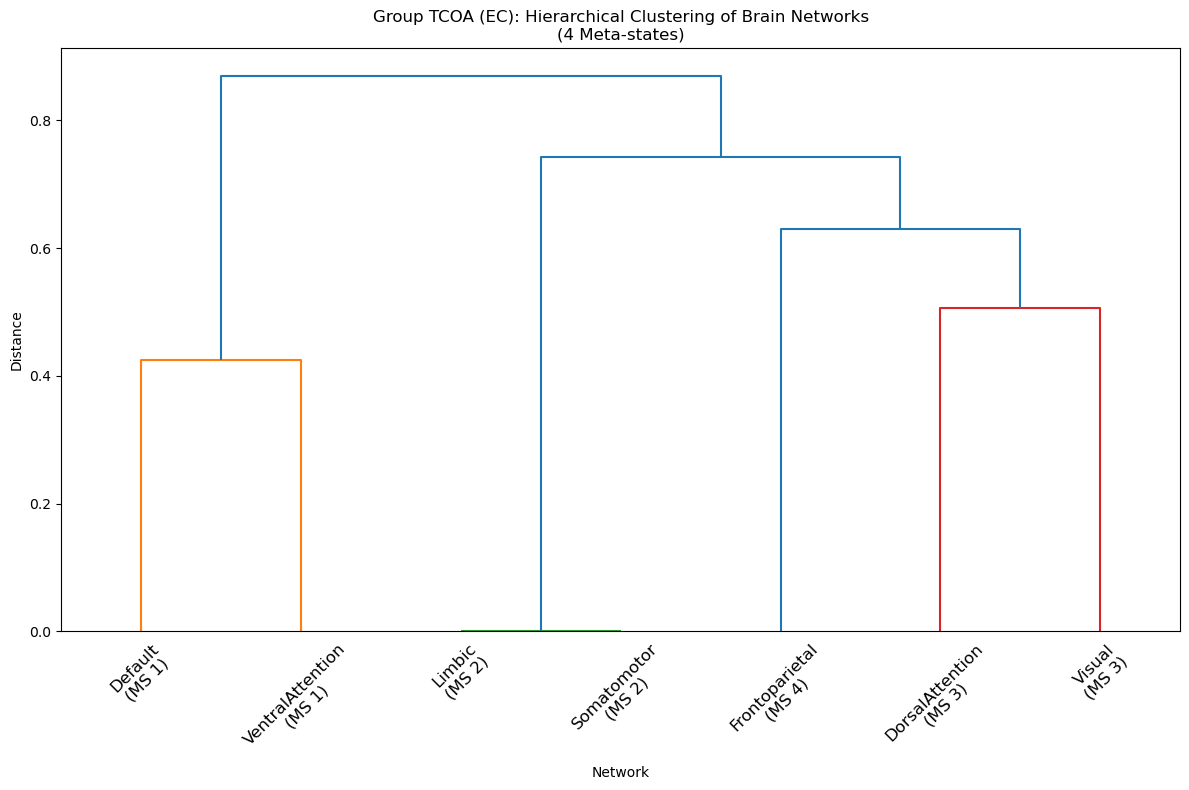

  Meta-state Composition for Group TCOA EC:
    Meta-state 1: Default, VentralAttention
    Meta-state 3: DorsalAttention, Visual
    Meta-state 4: Frontoparietal
    Meta-state 2: Limbic, Somatomotor

=== Processing Group: TCOA, Mode: EO ===
  Computed similarity matrix for 7 networks.
  Performed hierarchical clustering.
  Optimal number of meta-states determined: 2


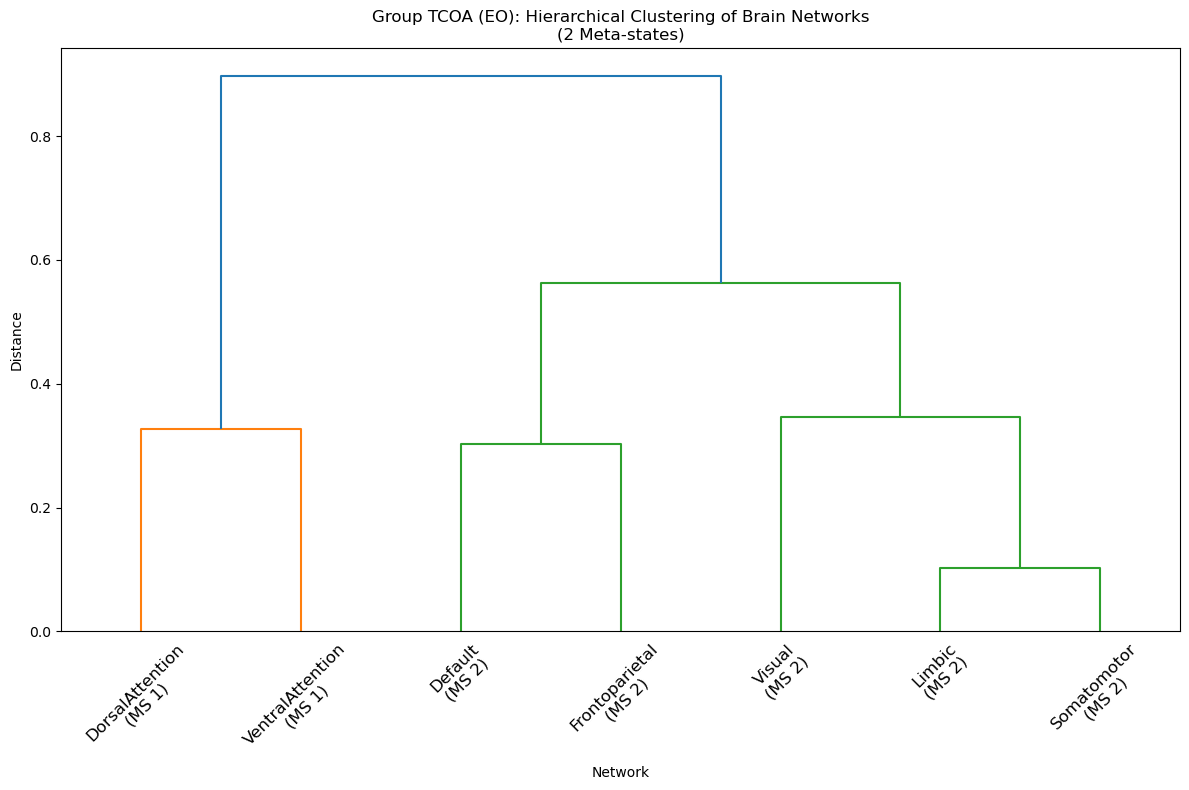

  Meta-state Composition for Group TCOA EO:
    Meta-state 2: Default, Frontoparietal, Limbic, Somatomotor, Visual
    Meta-state 1: DorsalAttention, VentralAttention

=== Processing Group: OAC, Mode: EC ===
  Computed similarity matrix for 7 networks.
  Performed hierarchical clustering.
  Optimal number of meta-states determined: 3


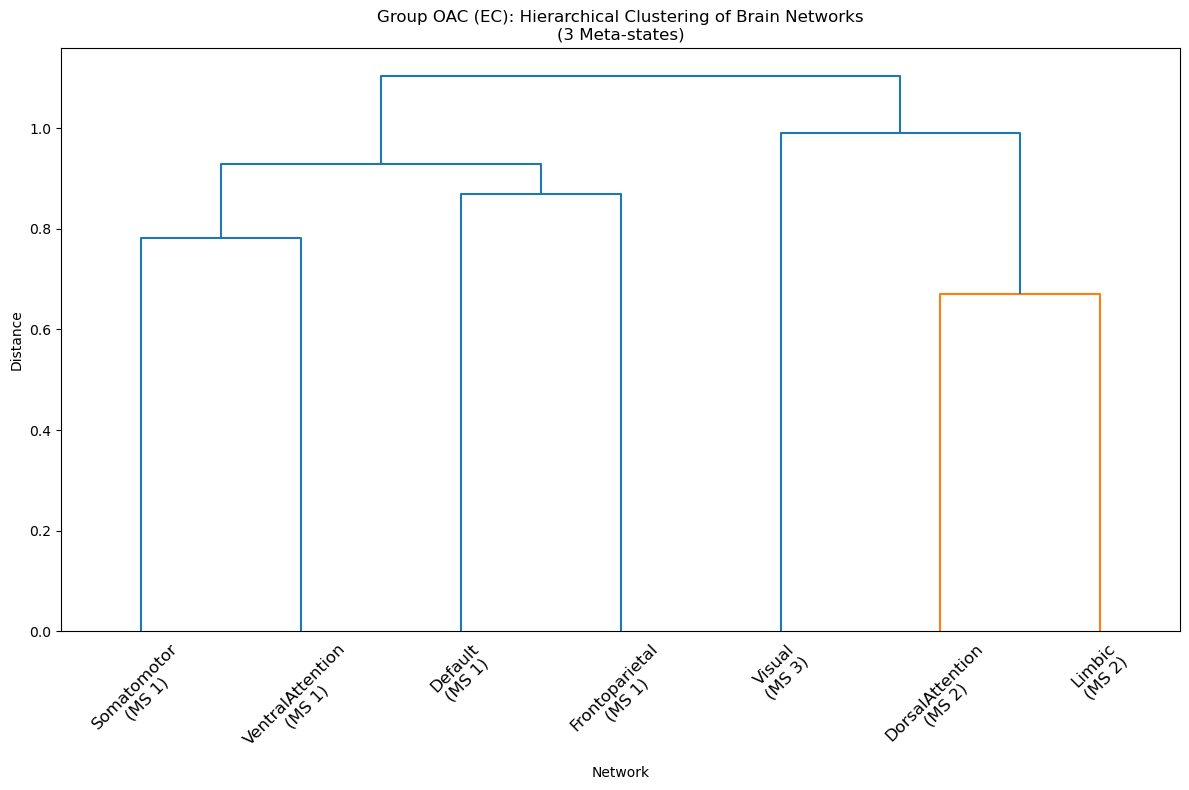

  Meta-state Composition for Group OAC EC:
    Meta-state 1: Default, Frontoparietal, Somatomotor, VentralAttention
    Meta-state 2: DorsalAttention, Limbic
    Meta-state 3: Visual

=== Processing Group: OAC, Mode: EO ===
  Computed similarity matrix for 7 networks.
  Performed hierarchical clustering.
  Optimal number of meta-states determined: 3


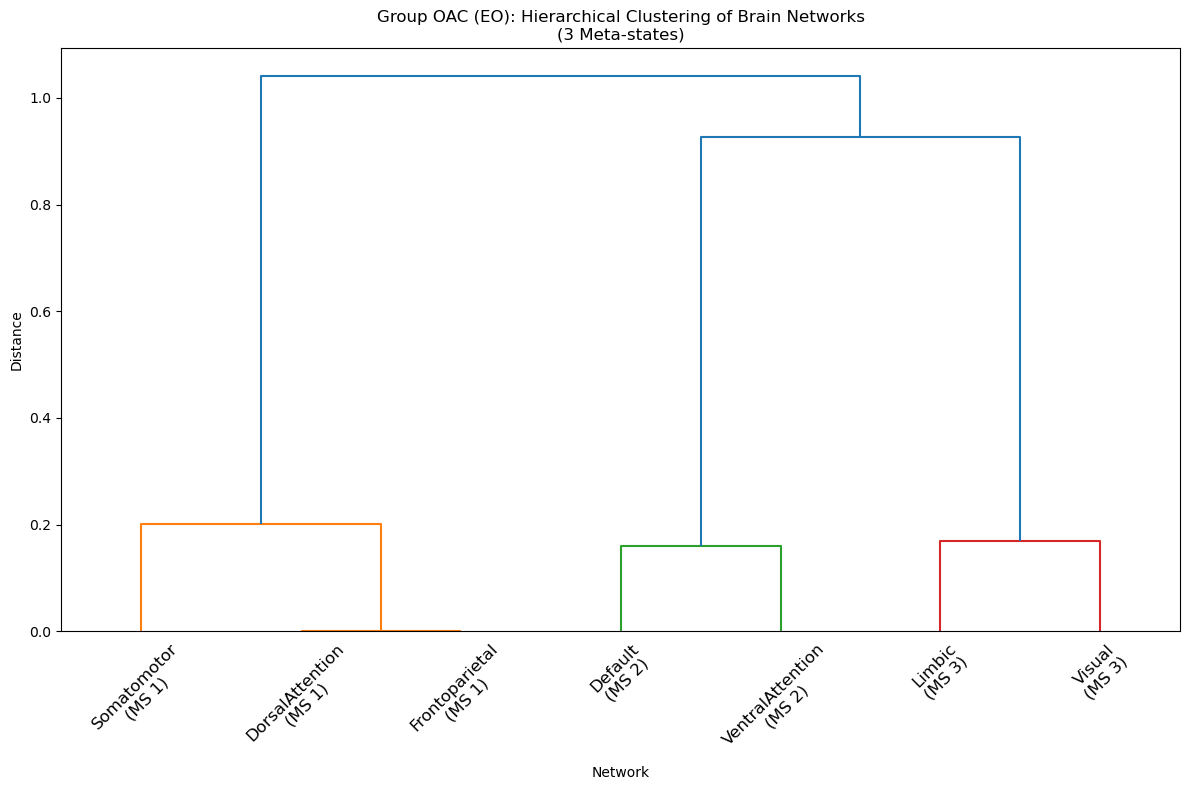

  Meta-state Composition for Group OAC EO:
    Meta-state 2: Default, VentralAttention
    Meta-state 1: DorsalAttention, Frontoparietal, Somatomotor
    Meta-state 3: Limbic, Visual


In [40]:
# Hierarchical Network Clustering Analysis

import os
import ast
import re
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import squareform, pdist
from sklearn.metrics import silhouette_score

# === Utility Functions ===

def parse_within_string(s):
    """
    Parse a within-network connectivity string of the form:
      "[Visual]: Vis_1-lh - -0.05 - Vis_2-lh"
    Returns the network name and the connectivity value.
    """
    pattern = r'\[(.*?)\]:.*?-\s*([-\d\.]+)\s*-'
    match = re.search(pattern, s)
    if match:
        network = match.group(1).strip()
        connectivity = float(match.group(2))
        return network, connectivity
    return None, None

def parse_between_string(s):
    """
    Parse a between-network connectivity string of the form:
      "[Visual, Somatomotor]: Vis_1-lh - 0.03 - SomMot_1-lh"
    Returns a tuple of network names and the connectivity value.
    """
    pattern = r'\[(.*?),(.*?)\]:.*?-\s*([-\d\.]+)\s*-'
    match = re.search(pattern, s)
    if match:
        network1 = match.group(1).strip()
        network2 = match.group(2).strip()
        connectivity = float(match.group(3))
        return (network1, network2), connectivity
    return None, None

def extract_state_window(key):
    """
    Extract (state, window) from a key.
    The key is assumed to contain a substring in parentheses, e.g. "(4, 22)".
    """
    if "(" in key and ")" in key:
        tuple_str = key[key.find("(") : key.find(")") + 1]
        try:
            return ast.literal_eval(tuple_str)
        except Exception as e:
            print(f"Error parsing key '{key}': {e}")
    return None

def compute_group_similarity(avg_within, avg_between):
    """
    Compute a group-level network similarity matrix from averaged connectivity.
    For within-network values, use the diagonal; for between-network values, use off-diagonals.
    """
    # Collect all unique network names from within- and between-network data.
    networks = set(avg_within.keys())
    for net_pair in avg_between.keys():
        networks.update(net_pair)
    networks = sorted(list(networks))
    n = len(networks)
    network_to_idx = {net: i for i, net in enumerate(networks)}
    sim_matrix = np.zeros((n, n))
    # Fill diagonal with within-network values
    for net, val in avg_within.items():
        idx = network_to_idx[net]
        sim_matrix[idx, idx] = val
    # Fill off-diagonals with between-network values
    for (net1, net2), val in avg_between.items():
        i, j = network_to_idx[net1], network_to_idx[net2]
        sim_matrix[i, j] = val
        sim_matrix[j, i] = val
    return sim_matrix, networks

def hierarchical_network_clustering(sim_matrix):
    """
    Normalize the similarity matrix, convert to a distance matrix, and perform hierarchical clustering.
    """
    sim_min, sim_max = np.min(sim_matrix), np.max(sim_matrix)
    if sim_max != sim_min:
        norm_sim = (sim_matrix - sim_min) / (sim_max - sim_min)
    else:
        norm_sim = sim_matrix
    distances = 1 - norm_sim
    distances = (distances + distances.T) / 2  # enforce symmetry
    np.fill_diagonal(distances, 0)
    linkage_matrix = linkage(squareform(distances), method='ward')
    return linkage_matrix, distances

def plot_network_dendrogram(linkage_matrix, networks, n_clusters, group, mode):
    clusters = fcluster(linkage_matrix, n_clusters, criterion='maxclust')
    labels = [f"{net}\n(MS {cl})" for net, cl in zip(networks, clusters)]
    plt.figure(figsize=(12, 8))
    dendrogram(linkage_matrix, labels=labels, leaf_rotation=45)
    plt.title(f'Group {group} ({mode}): Hierarchical Clustering of Brain Networks\n({n_clusters} Meta-states)')
    plt.xlabel('Network')
    plt.ylabel('Distance')
    plt.tight_layout()
    plt.show()

def analyze_network_clusters(linkage_matrix, networks, n_clusters):
    clusters = fcluster(linkage_matrix, n_clusters, criterion='maxclust')
    comp = defaultdict(list)
    for net, cl in zip(networks, clusters):
        comp[f"Meta-state {cl}"].append(net)
    return dict(comp)

# === Group-Level Analysis Parameters ===

# Define groups (adjust participant IDs as needed)
groups = {
    'YAC': ['101', '102', '103', '104', '105', '111', '112', '113', '114', 
            '115', '116', '117', '118', '119', '120'],
    'TCOA': ['401', '402', '403', '404', '406', '407', '408', '409', '410', 
             '411', '412', '413', '414', '415', '416'],
    'OAC': ['202', '205', '206', '207', '208', '209', '210', '211', '214', 
            '215', '216', '217', '218', '219', '221']
}

base_dir = "/home/cerna3/neuroconn/data/out/subjects/"
modes = ['EC', 'EO']

# Tracking message
print("Starting group-level connectivity aggregation...")

# Initialize aggregation dictionaries per group and mode.
# Structure: group_agg_within[group][mode][network] = list of connectivity values
#            group_agg_between[group][mode][(net1, net2)] = list of connectivity values
group_agg_within = {grp: {mode: defaultdict(list) for mode in modes} for grp in groups}
group_agg_between = {grp: {mode: defaultdict(list) for mode in modes} for grp in groups}

for grp, participants in groups.items():
    print(f"\nProcessing group {grp} with {len(participants)} participants.")
    for participant in participants:
        for mode in modes:
            part_dir = os.path.join(base_dir, participant, mode)
            within_path = os.path.join(part_dir, f"{participant}_{mode}_within_network_conn_raw.npz")
            between_path = os.path.join(part_dir, f"{participant}_{mode}_between_network_conn_raw.npz")
            if not (os.path.exists(within_path) and os.path.exists(between_path)):
                print(f"  Missing files for participant {participant} in mode {mode}. Skipping.")
                continue
            try:
                raw_within = np.load(within_path, allow_pickle=True)
                raw_between = np.load(between_path, allow_pickle=True)
                print(f"  Loaded files for participant {participant} in mode {mode}.")
            except Exception as e:
                print(f"  Error loading files for participant {participant} in mode {mode}: {e}")
                continue
            # Process within-network connectivity for this participant
            for key in raw_within.files:
                sw = extract_state_window(key)
                if sw is None:
                    print(f"    Skipping key '{key}' for participant {participant} (cannot extract state/window).")
                    continue
                for s in raw_within[key]:
                    net, conn = parse_within_string(s)
                    if net is not None:
                        group_agg_within[grp][mode][net].append(conn)
            # Process between-network connectivity for this participant
            for key in raw_between.files:
                sw = extract_state_window(key)
                if sw is None:
                    print(f"    Skipping key '{key}' for participant {participant} (cannot extract state/window).")
                    continue
                for s in raw_between[key]:
                    net_pair, conn = parse_between_string(s)
                    if net_pair is not None:
                        group_agg_between[grp][mode][net_pair].append(conn)

# Average the connectivity values across participants for each group and mode.
print("\nAveraging connectivity values across participants...")
group_avg_within = {grp: {} for grp in groups}   # group_avg_within[grp][mode] = {network: avg_value}
group_avg_between = {grp: {} for grp in groups}
for grp in groups:
    for mode in modes:
        avg_within = {}
        for net, vals in group_agg_within[grp][mode].items():
            if vals:
                avg_within[net] = np.mean(vals)
        group_avg_within[grp][mode] = avg_within
        
        avg_between = {}
        for net_pair, vals in group_agg_between[grp][mode].items():
            if vals:
                avg_between[net_pair] = np.mean(vals)
        group_avg_between[grp][mode] = avg_between
        print(f"  Group {grp} mode {mode}: Averaged {len(avg_within)} within-network and {len(avg_between)} between-network entries.")

# === Group-Level Network Clustering Analysis ===

print("\nStarting group-level network clustering analysis...")
for grp in groups:
    for mode in modes:
        print(f"\n=== Processing Group: {grp}, Mode: {mode} ===")
        avg_within = group_avg_within[grp][mode]
        avg_between = group_avg_between[grp][mode]
        if not avg_within:
            print(f"  No within-network connectivity data for group {grp} mode {mode}. Skipping clustering.")
            continue
        # Compute group-level similarity matrix
        sim_matrix, networks = compute_group_similarity(avg_within, avg_between)
        if sim_matrix.size == 0:
            print(f"  No aggregated connectivity data for group {grp} mode {mode}.")
            continue
        print(f"  Computed similarity matrix for {len(networks)} networks.")
        # Perform hierarchical clustering
        linkage_matrix, distances = hierarchical_network_clustering(sim_matrix)
        print("  Performed hierarchical clustering.")
        # Determine optimal number of clusters via silhouette analysis
        silhouette_scores = []
        max_clusters = min(10, len(networks))
        for n_clusters in range(2, max_clusters + 1):
            clusters = fcluster(linkage_matrix, n_clusters, criterion='maxclust')
            if len(np.unique(clusters)) > 1:
                score = silhouette_score(distances, clusters, metric='precomputed')
                silhouette_scores.append(score)
        optimal_clusters = np.argmax(silhouette_scores) + 2 if silhouette_scores else 2
        print(f"  Optimal number of meta-states determined: {optimal_clusters}")
        # Plot dendrogram and display meta-state composition
        plot_network_dendrogram(linkage_matrix, networks, optimal_clusters, grp, mode)
        comp = analyze_network_clusters(linkage_matrix, networks, optimal_clusters)
        print(f"  Meta-state Composition for Group {grp} {mode}:")
        for ms, nets in comp.items():
            print(f"    {ms}: {', '.join(nets)}")